<a href="https://colab.research.google.com/github/viviansophie/111-1-econDV/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color

[reference](https://ggplot2-book.org/scale-colour.html)

  * Hue (色像）
  * Chroma（彩度）
  * Luminance（流明）

## Quantitative




### Single sequential 

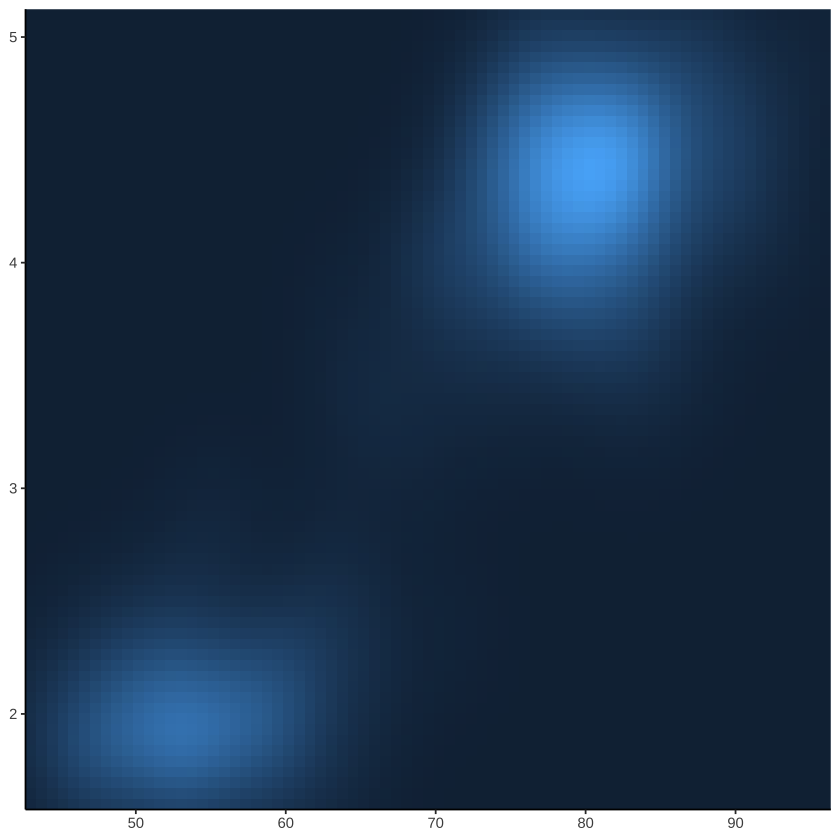

In [ ]:
plt = econDV2::Plot()
plt$ggplot = ggplot(faithfuld, aes(waiting, eruptions, fill = density)) 
plt$geom = geom_raster() 
plt$others = list(
  scale_x_continuous(NULL, expand = c(0, 0)),
  scale_y_continuous(NULL, expand = c(0, 0)), 
  theme(legend.position = "none"))
plt$make()

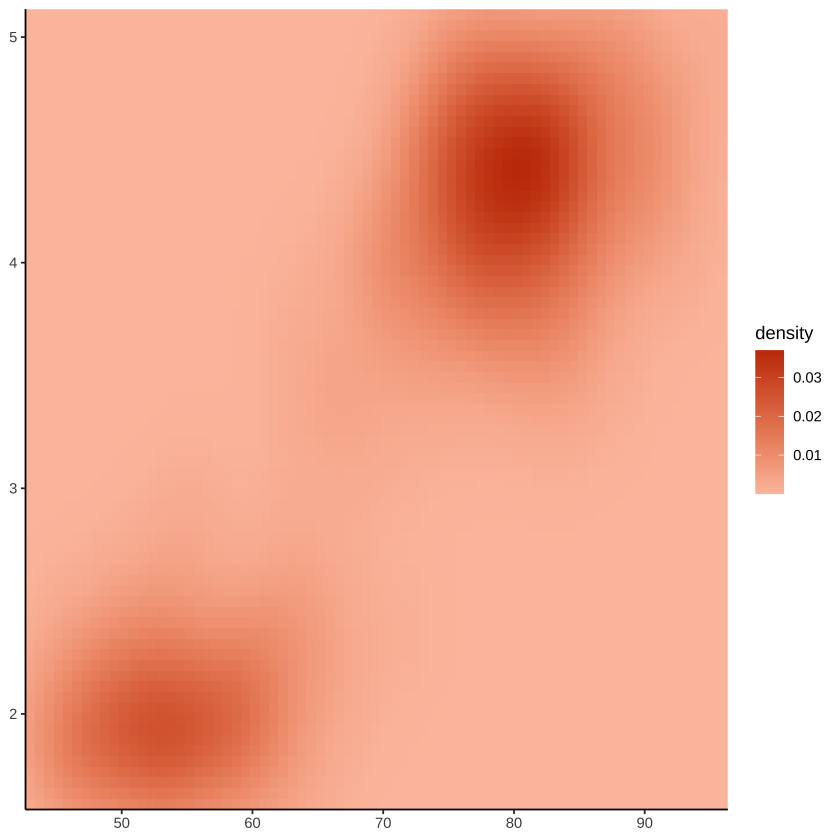

In [ ]:
plt$scale = scale_fill_gradient(
  low= "#fcc2ab", # in HSL space, move only L 
  high= "#c63c06" # manual choice
)
plt$others[[3]] <- NULL

plt$make()

### Diverging sequential 

You need to install `sf` package for this example

In [ ]:
remotes::install_github("tpemartin/econIDV")

SyntaxError: ignored

In [ ]:
examples=econIDV::Examples()
examples$election()
examples$election_env$attach()

The following objects are masked from ex (pos = 3):

    add_adjustedWinningPartyVoteShare, add_intervalLabels,
    add_trace_name, attach, clean_data, clean_merge_data,
    create_distinctLabels, create_newLevels4split, create_sf,
    create_subplot, detach, directPlotlyPlot, download_electionData,
    generate_palette, generate_plots_countiesXparties,
    generate_subplot_countiesXparties, get_orderedLabels,
    get_twoPartyPals, plot_3yearsElection, plot_allYears,
    plot_electionMaps, plot_electionsOverYears,
    plot_oneYearElectionMap, prepare_choroplethMapData,
    prepare_dataTableData, prepare_fillColorByYears_data,
    prepare_for_choroplethColor, prepare_wider_data, Rscripts


The following objects are masked from ex (pos = 6):

    add_adjustedWinningPartyVoteShare, add_intervalLabels,
    add_trace_name, attach, clean_data, clean_merge_data,
    create_distinctLabels, create_newLevels4split, create_sf,
    create_subplot, detach, directPlotlyPlot, download_electionData,
 

In [ ]:
download_electionData()
# prepare choropleth map data
elections |>
  prepare_choroplethMapData() -> df_elections
df_elections |>
  prepare_fillColorByYears_data() -> df_elections_wider

# prepare datatable data
df_elections |>
  prepare_dataTableData() -> df_4dataTable_wide

df_elections_wider |>
  as.data.frame() |> # to remove tibble class for row.names assignment
  create_sf() |>
  # 移除geometry空的資料, 否則ggplotly會有錯誤
  econIDV::remove_emptyGeometry() ->
  sf_elections_wider

Object elections is in the global environment now.



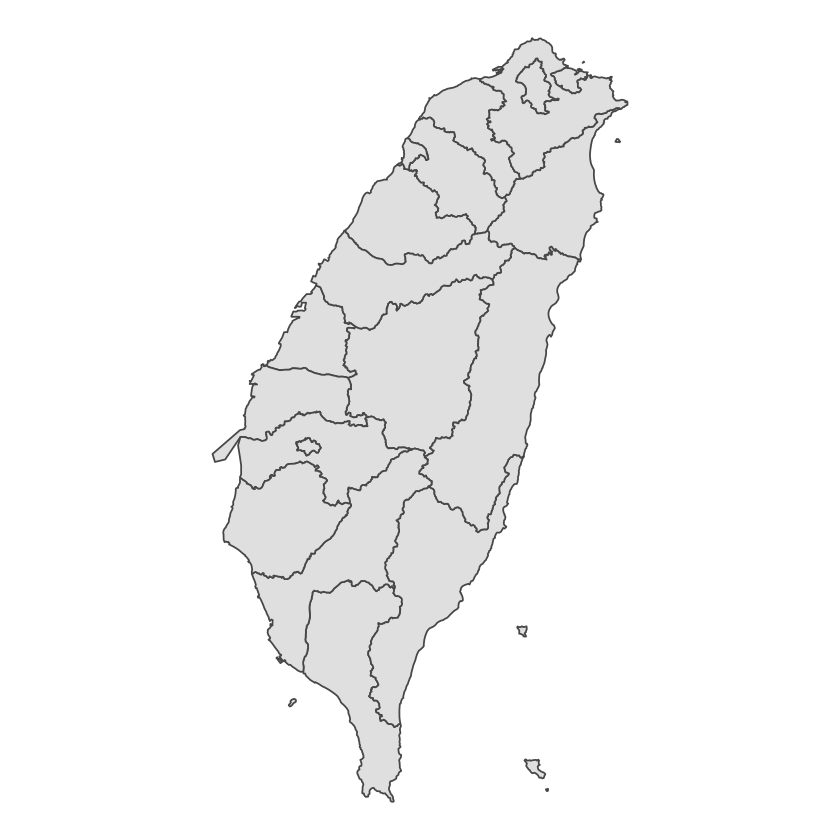

In [ ]:

mp = econDV2::Map()
plt2 = econDV2::Plot()
plt2$ggplot = ggplot(data = sf_elections_wider)
plt2$geom = geom_sf()
plt2$theme = theme_void()
plt2$make()

:

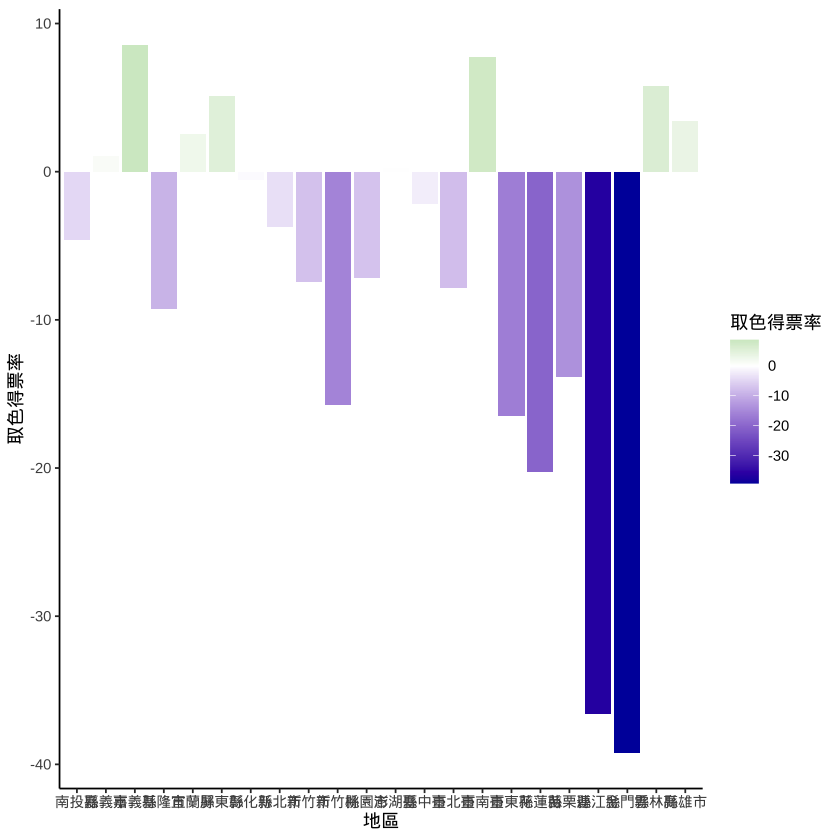

In [ ]:
plt3 = econDV2::Plot()
df_elections |>
  mutate(
    取色得票率 = dplyr::if_else(取色得票率>0, 取色得票率-50, 取色得票率+50)
  ) -> df_elections
plt3$ggplot = ggplot(data=df_elections |> dplyr::filter(年==2012))
plt3$geom = geom_col(
  aes(
    x=地區, y=取色得票率, fill=取色得票率
  )
)
#plt3$scale = scale_fill_brewer(
#  type="div", palette="BrBG"
#)

plt3$scale = scale_fill_gradient2(
  high ="#009a00", # 50
  low = "#0000aa", # -50
  midpoint = 0
)
plt3$make()

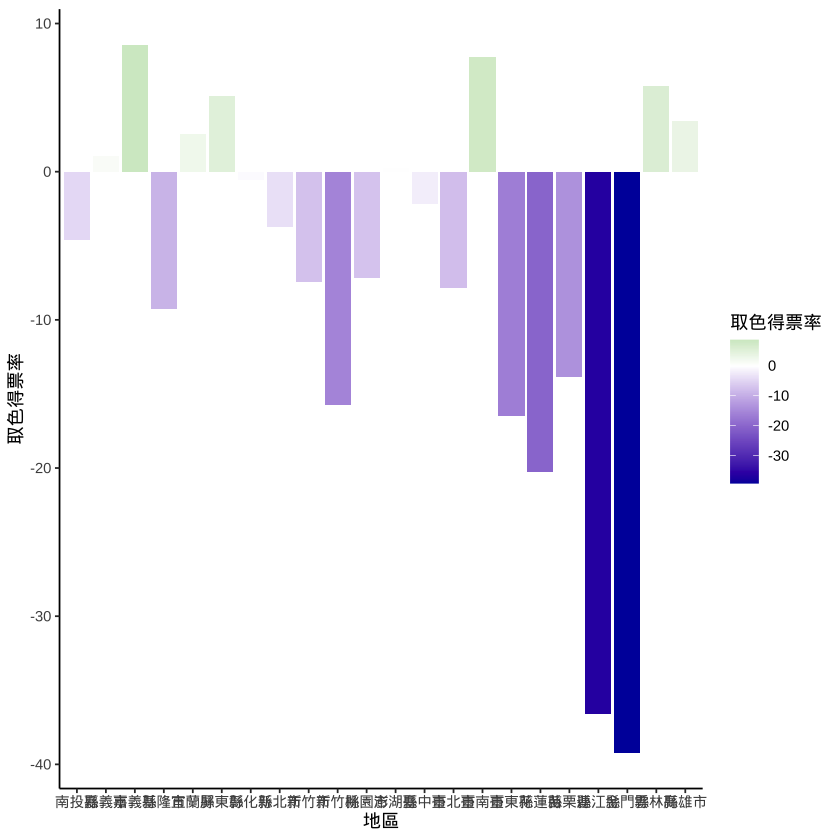

In [ ]:
plt3 = econDV2::Plot()
df_elections |>
  mutate(
    取色得票率 = dplyr::if_else(取色得票率>0, 取色得票率-50, 取色得票率+50)
  ) -> df_elections
df_elections |> View()

# rescale: c(-50, 50) -> c(-1,1)
# ensure low and high colors mapped from the lowest/highest POSSIBLE values
df_elections |>
  mutate(
    取色得票率=scales::rescale(
      取色得票率, from=c(-50,50 ),
      to=c(-1,1)
    )
  ) -> df_elections

plt3$ggplot = ggplot(data=df_elections |> dplyr::filter(年==2012))
plt3$geom = geom_col(
  aes(
    x=地區, y=取色得票率, fill=取色得票率
  )
)

# Use labels to rescale/mapping back to 取色得票率's original values
plt3$scale = list(scale_fill_gradient2(
  high ="#009a00", # 1
  low = "#0000aa", # -1
  midpoint = 0,
  # breaks is based on c(-1,1) 取色得票率
  # if no labels adjustment, labels = breaks.
  labels = function(x) scales::rescale(x, to=c(-50,50), from =c(-1,1))
),
scale_y_continuous(
  labels=function(x) scales::rescale(x, to=c(-50,50), from =c(-1,1))
))
plt3$make()